In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from acin_colors import acin_colors

In [151]:
import pandas as pd

df = pd.read_csv('traj.csv')

df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,0.028081,-0.629064,-0.742714,-0.223687,0.092777,-0.755718,0.060137,-0.686266,0.283554,...,0.079855,0.735139,-0.135653,0.752034,0.656284,0.299941,-0.211241,0.263263,0.224822,-0.358104
1,1,-0.386858,0.742999,-0.184128,-0.784930,0.751703,0.775949,-0.221362,-0.007579,0.482030,...,-0.757631,-0.549434,-0.089748,0.357030,0.759266,0.305487,0.131470,-0.298863,0.026325,-0.425357
2,2,0.288573,0.721965,0.455069,-0.651412,0.483746,-0.776669,0.115550,0.301866,0.648648,...,0.720091,0.708631,0.524486,-0.441815,0.306389,0.242483,-0.654991,-0.658429,-0.490935,0.247087
3,3,-0.691312,-0.763656,-0.389139,-0.645435,0.048545,-0.160127,-0.762499,-0.774772,-0.248474,...,0.273155,-0.763745,0.195614,-0.242357,0.170882,-0.710242,0.351747,0.026810,0.239348,-0.227117
4,4,-0.369854,0.623040,0.283981,-0.321846,-0.484978,0.235519,0.394411,0.596738,0.113613,...,0.339419,-0.046621,0.221238,-0.489076,0.023366,-0.125878,-0.433363,-0.062854,0.516104,-0.452815
5,5,-0.574062,0.583832,0.509451,0.490530,0.773556,0.525827,0.272564,-0.242244,0.423145,...,0.340071,-0.206410,0.289005,-0.016260,-0.015363,-0.532650,-0.553918,0.601069,-0.352037,0.510676
6,6,0.692205,-0.507806,-0.088380,0.142257,-0.316411,0.243301,0.277176,-0.622812,0.517782,...,-0.675109,-0.403673,-0.312671,-0.150831,-0.477001,0.189157,-0.671297,-0.524724,-0.755343,0.476993


In [152]:
acin_colors

{'red': (0.7294117647058823, 0.07058823529411765, 0.16862745098039217),
 'gray': (0.4, 0.4, 0.4),
 'yellow': (0.9882352941176471, 0.8, 0.2784313725490196),
 'green': (0.0, 0.7450980392156863, 0.2549019607843137),
 'blue': (0.0, 0.4, 0.6),
 'yellow_variant': (1.0, 0.9333333333333333, 0.0),
 'green_variant': (0.615686274509804, 0.8509803921568627, 0.0),
 'blue_variant': (0.07450980392156863, 0.36470588235294116, 1.0),
 'pink_variant': (0.792156862745098, 0.0, 0.35294117647058826),
 'violet_variant': (0.8549019607843137, 0.12941176470588237, 1.0)}

In [153]:
# joint limits
j_lims={}
j_lims[1]={ "lower":    -170
            ,"upper":    170
            ,"effort":   320
            ,"vel":      1.4835
            }
j_lims[2]={ "lower":    -120
            ,"upper":    120
            ,"effort":   320
            ,"vel":      1.4835
            }
j_lims[3]={ "lower":    -170
            ,"upper":    170
            ,"effort":   176
            ,"vel":      1.7453
            }
j_lims[4]={ "lower":    -120
            ,"upper":    120
            ,"effort":   176
            ,"vel":      1.3090
            }
j_lims[5]={ "lower":    -170
            ,"upper":    170
            ,"effort":   110
            ,"vel":      2.2689
            }
j_lims[6]={ "lower":    -120
            ,"upper":    120
            ,"effort":   40
            ,"vel":      2.3562
            }
j_lims[7]={ "lower":    -175
            ,"upper":    175
            ,"effort":   40
            ,"vel":      2.3562
            }

def cm_to_inch(l_cm):
    return l_cm*0.393701

def plot_with_joint_limits(joints, time):
    fig, axs = plt.subplots(4,2, figsize=(cm_to_inch(17), cm_to_inch(17)))
    fig.suptitle('')
    #fig.tight_layout()
    for i, ax in enumerate(list(axs.flatten())[:-1]):
        ax.fill_between(time, [j_lims[i+1]["lower"]], [j_lims[i+1]["upper"]], alpha=0.1, color=acin_colors['gray'], label='_Hidden')
        ax.plot(time, joints[i,:], color=acin_colors['blue'], label=f"joint {i}")
        ax.set_ylim([-200, 200])
        ax.set_xlim([0, len(qs[1])])
        ax.legend()
        #ax.set_xticks([])
        ax.grid(which='both')
        
    axs[0,0].set_ylabel("angle [°]")
    axs[1,0].set_ylabel("angle [°]")
    axs[2,0].set_ylabel("angle [°]")
    axs[3,0].set_ylabel("angle [°]")
    
    axs[3,0].set_xlabel("Trajectory points")
    axs[2,1].set_xlabel("Trajectory points")
    
    list(axs.flatten())[-1].axis('off')
    plt.show()
    return fig

In [154]:
qs = df.to_numpy()
qs = qs[:,1:]
qs = qs/np.pi*180
print(f"shape qs {np.shape(qs)}")
x = np.arange(len(qs[1]))

shape qs (7, 120)


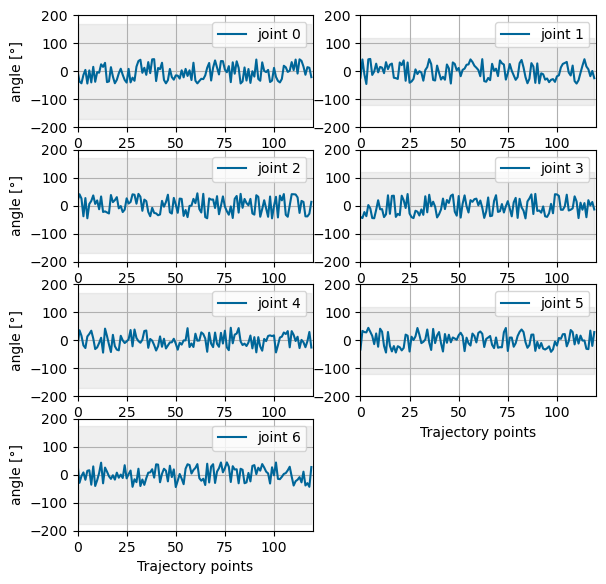

In [155]:
fig = plot_with_joint_limits(qs, x)

In [156]:
fig.savefig('traj_plot.pdf')

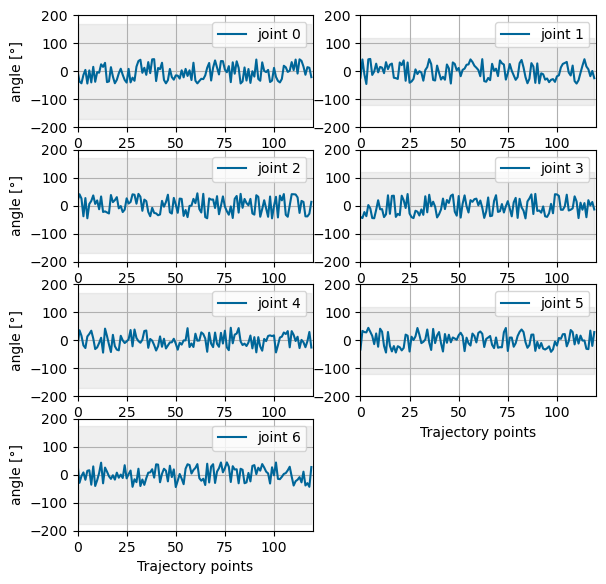

In [157]:
fig